<a href="https://colab.research.google.com/github/polina-minaeva/feature-selection/blob/main/11_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель. Сгенерируем датасет, затем классифицируем данные. Для улучшения качества модели классификации используем несколько вариантов отбора признаков.

1. Генерация данных

In [ ]:
#Сгенерируем данные

from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [ ]:
x_data_generated

array([[-1.13809033, -1.72865615, -0.48878705, ..., -0.95457645,
         0.474502  , -0.68584318],
       [ 0.32500132,  0.55508997,  1.80672046, ...,  0.2660744 ,
        -0.59831372, -2.66332362],
       [ 0.37027071, -0.16913395, -0.2176661 , ..., -1.0364544 ,
         0.1726915 ,  1.67687971],
       ...,
       [ 0.45098351, -0.9234398 ,  0.78491397, ...,  0.63717356,
         0.81773517, -2.56093227],
       [-0.11922901,  1.28960777,  0.57409217, ..., -0.74035014,
        -0.32293098, -0.57588906],
       [ 0.39619285, -0.04086059, -0.11109937, ...,  0.03579203,
         2.86436331,  0.49427975]])

In [ ]:
y_data_generated

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_data_generated.shape

(100,)

2. Построение логистической регрессии и оценка средней точности

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(random_state=42).fit(x_data_generated, y_data_generated)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#В случае использования перекрестной проверки нам не нужно разбивать данные на трейн и тест
cross_val_score(LR, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8

Точность модели логистической регрессии составила 80%.

3. Отбор признаков с помощью статистических методов. Матрица корреляции. VarianceThreshold

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
feat_columns = range(20)

In [ ]:
x_data_generated

array([[-1.13809033, -1.72865615, -0.48878705, ..., -0.95457645,
         0.474502  , -0.68584318],
       [ 0.32500132,  0.55508997,  1.80672046, ...,  0.2660744 ,
        -0.59831372, -2.66332362],
       [ 0.37027071, -0.16913395, -0.2176661 , ..., -1.0364544 ,
         0.1726915 ,  1.67687971],
       ...,
       [ 0.45098351, -0.9234398 ,  0.78491397, ...,  0.63717356,
         0.81773517, -2.56093227],
       [-0.11922901,  1.28960777,  0.57409217, ..., -0.74035014,
        -0.32293098, -0.57588906],
       [ 0.39619285, -0.04086059, -0.11109937, ...,  0.03579203,
         2.86436331,  0.49427975]])

In [ ]:
df = pd.DataFrame(data=x_data_generated, columns=feat_columns)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.138090,-1.728656,-0.488787,0.901333,-1.512019,-0.428017,-0.420079,0.723844,-1.215782,0.811702,1.068929,-0.365015,-0.771528,0.393029,-1.129301,-0.980044,1.410511,-0.954576,0.474502,-0.685843
1,0.325001,0.555090,1.806720,0.321130,-0.374094,0.532545,0.283601,-0.824567,0.511197,2.413530,0.282117,-1.282148,0.471378,-0.100062,-2.438526,0.616822,-0.816964,0.266074,-0.598314,-2.663324
2,0.370271,-0.169134,-0.217666,-0.687585,-1.125668,1.601192,-0.217814,0.178838,-0.096717,-1.025149,-1.315842,-0.820212,-1.484662,-0.238024,-0.034400,1.160498,-1.375858,-1.036454,0.172691,1.676880
3,1.065041,1.119363,-0.132759,1.373794,-0.398517,-0.779727,-0.318304,0.918499,1.353308,-0.800680,-0.905934,0.744459,-0.007180,0.097376,0.376216,-0.173542,0.060419,0.807462,-0.494242,2.351622
4,1.336331,0.593361,0.429089,-1.457482,0.654141,0.262852,-0.290008,1.683259,-0.383284,2.388909,1.241037,0.509201,1.138847,-1.418573,-1.172479,0.425051,-0.590976,-1.947035,1.081676,-1.322057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.463088,-0.966688,0.723111,-0.059168,-1.180841,-0.841647,3.781322,-0.199778,-1.578038,-0.611075,-0.800299,0.799461,-0.701491,-0.700541,-0.061762,-1.008603,1.343708,-0.667070,0.447692,0.714926
96,-1.315025,0.668483,-0.825339,-0.897748,-0.750810,1.024427,-0.115266,1.993531,0.646737,-0.889873,-0.963523,0.089592,-0.912205,1.114939,3.048913,1.035762,-1.336822,1.130089,0.600154,-1.487635
97,0.450984,-0.923440,0.784914,-0.801454,-0.653465,-1.337129,0.864032,-1.047068,1.326681,0.292772,1.252111,-1.434172,1.577748,0.645813,0.313756,-1.371147,1.774805,0.637174,0.817735,-2.560932
98,-0.119229,1.289608,0.574092,-0.272763,0.929020,-2.298741,-1.553792,0.169957,-0.544259,0.703525,-1.269274,0.945669,0.754373,0.030833,-0.628974,-1.270782,1.359909,-0.740350,-0.322931,-0.575889


In [ ]:
y_data_generated

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
df['class'] = y_data_generated
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.138090,-1.728656,-0.488787,0.901333,-1.512019,-0.428017,-0.420079,0.723844,-1.215782,0.811702,...,-0.365015,-0.771528,0.393029,-1.129301,-0.980044,1.410511,-0.954576,0.474502,-0.685843,1
1,0.325001,0.555090,1.806720,0.321130,-0.374094,0.532545,0.283601,-0.824567,0.511197,2.413530,...,-1.282148,0.471378,-0.100062,-2.438526,0.616822,-0.816964,0.266074,-0.598314,-2.663324,1
2,0.370271,-0.169134,-0.217666,-0.687585,-1.125668,1.601192,-0.217814,0.178838,-0.096717,-1.025149,...,-0.820212,-1.484662,-0.238024,-0.034400,1.160498,-1.375858,-1.036454,0.172691,1.676880,1
3,1.065041,1.119363,-0.132759,1.373794,-0.398517,-0.779727,-0.318304,0.918499,1.353308,-0.800680,...,0.744459,-0.007180,0.097376,0.376216,-0.173542,0.060419,0.807462,-0.494242,2.351622,0
4,1.336331,0.593361,0.429089,-1.457482,0.654141,0.262852,-0.290008,1.683259,-0.383284,2.388909,...,0.509201,1.138847,-1.418573,-1.172479,0.425051,-0.590976,-1.947035,1.081676,-1.322057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.463088,-0.966688,0.723111,-0.059168,-1.180841,-0.841647,3.781322,-0.199778,-1.578038,-0.611075,...,0.799461,-0.701491,-0.700541,-0.061762,-1.008603,1.343708,-0.667070,0.447692,0.714926,0
96,-1.315025,0.668483,-0.825339,-0.897748,-0.750810,1.024427,-0.115266,1.993531,0.646737,-0.889873,...,0.089592,-0.912205,1.114939,3.048913,1.035762,-1.336822,1.130089,0.600154,-1.487635,1
97,0.450984,-0.923440,0.784914,-0.801454,-0.653465,-1.337129,0.864032,-1.047068,1.326681,0.292772,...,-1.434172,1.577748,0.645813,0.313756,-1.371147,1.774805,0.637174,0.817735,-2.560932,0
98,-0.119229,1.289608,0.574092,-0.272763,0.929020,-2.298741,-1.553792,0.169957,-0.544259,0.703525,...,0.945669,0.754373,0.030833,-0.628974,-1.270782,1.359909,-0.740350,-0.322931,-0.575889,0


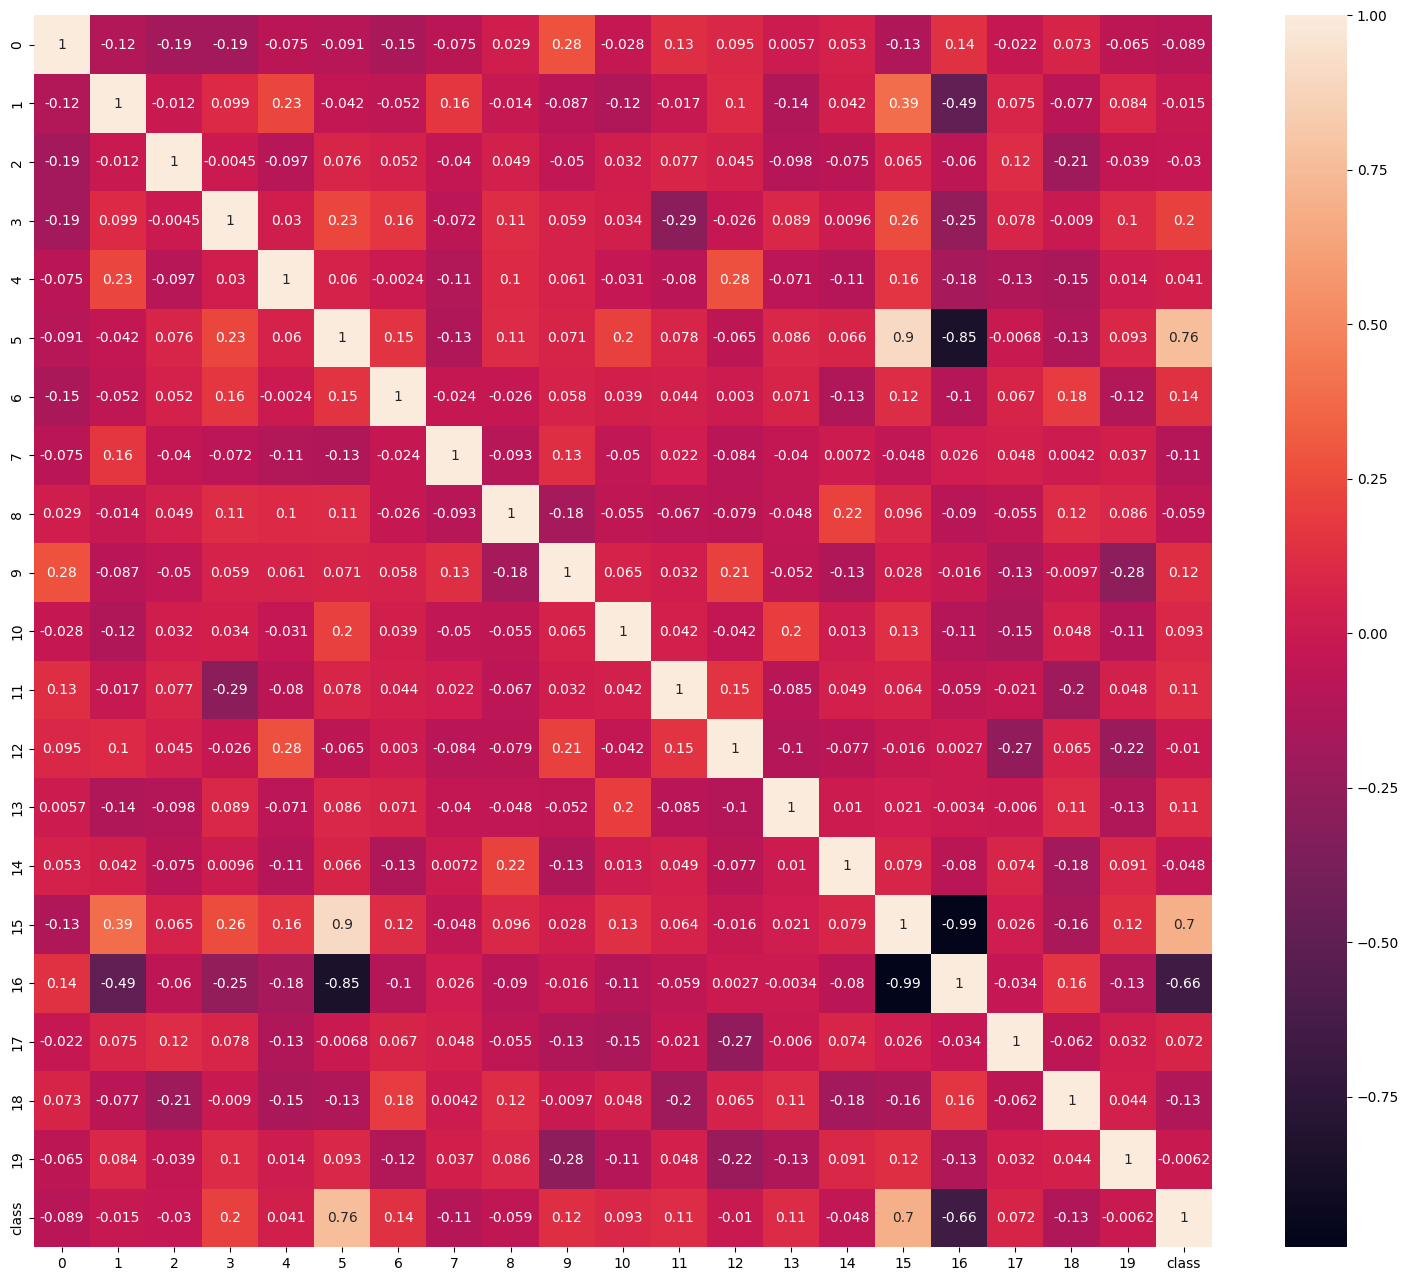

In [ ]:
#Построение матрицы корреляции
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(19,16))
sns.heatmap(corr,annot=True)
plt.show()

Наиболее коррелирующие с целевой переменной признаки: 5, 15, 16, 3, 6, 7, 9, 11, 13, 18

In [ ]:
feats2 = df[[ 3, 5, 6, 7, 9, 11, 13, 15, 16, 18]]
feats2

,3,5,6,7,9,11,13,15,16,18
0,0.901333,-0.428017,-0.420079,0.723844,0.811702,-0.365015,0.393029,-0.980044,1.410511,0.474502
1,0.321130,0.532545,0.283601,-0.824567,2.413530,-1.282148,-0.100062,0.616822,-0.816964,-0.598314
2,-0.687585,1.601192,-0.217814,0.178838,-1.025149,-0.820212,-0.238024,1.160498,-1.375858,0.172691
3,1.373794,-0.779727,-0.318304,0.918499,-0.800680,0.744459,0.097376,-0.173542,0.060419,-0.494242
4,-1.457482,0.262852,-0.290008,1.683259,2.388909,0.509201,-1.418573,0.425051,-0.590976,1.081676
...,...,...,...,...,...,...,...,...,...,...
95,-0.059168,-0.841647,3.781322,-0.199778,-0.611075,0.799461,-0.700541,-1.008603,1.343708,0.447692
96,-0.897748,1.024427,-0.115266,1.993531,-0.889873,0.089592,1.114939,1.035762,-1.336822,0.600154
97,-0.801454,-1.337129,0.864032,-1.047068,0.292772,-1.434172,0.645813,-1.371147,1.774805,0.817735
98,-0.272763,-2.298741,-1.553792,0.169957,0.703525,0.945669,0.030833,-1.270782,1.359909,-0.322931


In [ ]:
LR2 = LogisticRegression(random_state=42).fit(feats2, y_data_generated)
cross_val_score(LR2, feats2, y_data_generated, scoring='accuracy').mean()

0.8

In [ ]:
#Теперь удалим низковариативные признаки с помощью VarianceThreshold

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
x3 = selector.fit_transform(x_data_generated)
x3

array([[-1.13809033, -1.72865615, -0.48878705, ..., -0.95457645,
         0.474502  , -0.68584318],
       [ 0.32500132,  0.55508997,  1.80672046, ...,  0.2660744 ,
        -0.59831372, -2.66332362],
       [ 0.37027071, -0.16913395, -0.2176661 , ..., -1.0364544 ,
         0.1726915 ,  1.67687971],
       ...,
       [ 0.45098351, -0.9234398 ,  0.78491397, ...,  0.63717356,
         0.81773517, -2.56093227],
       [-0.11922901,  1.28960777,  0.57409217, ..., -0.74035014,
        -0.32293098, -0.57588906],
       [ 0.39619285, -0.04086059, -0.11109937, ...,  0.03579203,
         2.86436331,  0.49427975]])

In [ ]:
LR3 = LogisticRegression(random_state=42).fit(x3, y_data_generated)
cross_val_score(LR3, x3, y_data_generated, scoring='accuracy').mean()

0.8

Точность модели не упала, зато количество признаков удалось уменьшить двумя статистическими способами: через матрицу корреляции и с помощью VarianceThreshold.

4. Отбор признаков на основе дисперсионного анализа (одномерный отбор)

In [ ]:
#Выберем 5 лучших признаков с помощью скоринговой функции для классификации

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
selector = SelectKBest(f_classif, k=5)
x4 = selector.fit_transform(x_data_generated, y_data_generated)

In [ ]:
x4.shape

(100, 5)

In [ ]:
LR4 = LogisticRegression(random_state=42).fit(x4, y_data_generated)
cross_val_score(LR4, x4, y_data_generated, scoring='accuracy').mean()

0.82

Точность модели повысились до 82% после одномерного отбора пяти признаков с тестом f.

5. Отбор признаков с использованием моделей. Логистическая регрессия. Случайный лес

In [ ]:
#Построим логистическую регрессию для отбора признаков с помощью l1-регуляризации

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(LogisticRegression(penalty='l1', solver='saga'), prefit=False, max_features=5, threshold=-np.inf)
x5 = selector.fit_transform(x_data_generated, y_data_generated)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
LR5 = LogisticRegression(random_state=42).fit(x5, y_data_generated)
cross_val_score(LR5, x5, y_data_generated, scoring='accuracy').mean()

0.85

Логистическая регрессия показала высокую точность 85%.

In [ ]:
#Построим случайный лес для отбора признаков

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(x_data_generated, y_data_generated)

In [ ]:
rf.feature_importances_

array([0.01691882, 0.03863452, 0.01867188, 0.02955812, 0.01779308,
       0.3391242 , 0.02466634, 0.01910254, 0.0235865 , 0.03274544,
       0.01638984, 0.01615867, 0.01859883, 0.01653096, 0.02685919,
       0.16079304, 0.1277791 , 0.01589203, 0.01897739, 0.0212195 ])

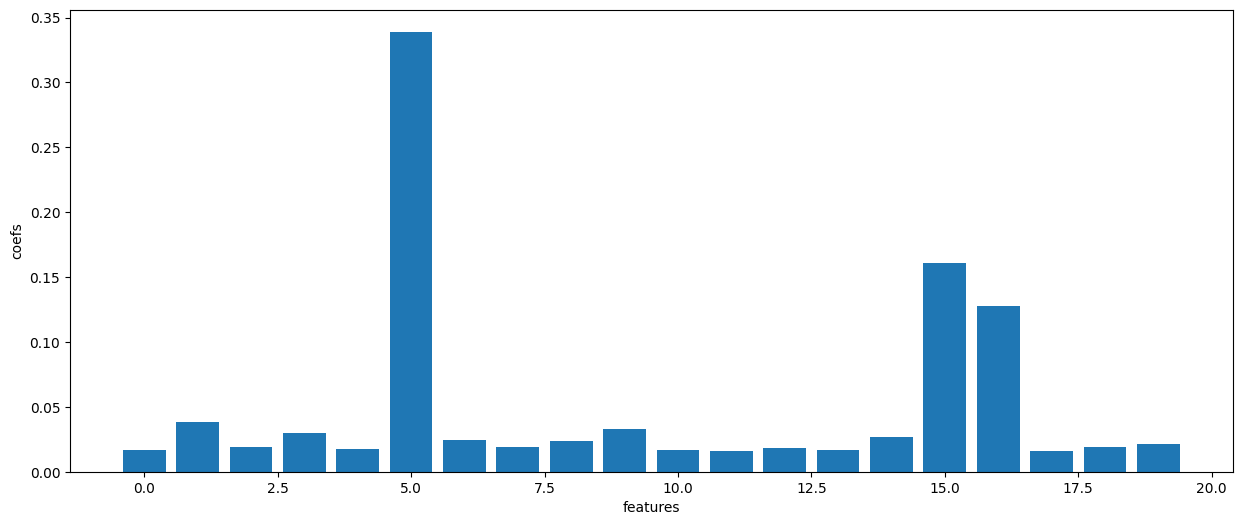

In [ ]:
#Воспользуемся атрибутом feature_impotance, чтобы увидеть наиболее значимые признаки. Визуализируем их.

plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.feature_importances_)), rf.feature_importances_)
plt.xlabel('features')
plt.ylabel('coefs');

In [ ]:
#Теперь отберем наиболее важные с помощью RFE. Ограничимся 5 признаками

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(rf, n_features_to_select=5, step=1)
selector = selector.fit(x_data_generated, y_data_generated)
selector.support_

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False])

In [ ]:
#Отсекаем ненужные признаки
x6 = selector.transform(x_data_generated)

In [ ]:
LR6 = LogisticRegression(random_state=42).fit(x6, y_data_generated)
cross_val_score(LR6, x6, y_data_generated, scoring='accuracy').mean()

0.82

6. Метод перебора признаков

In [ ]:
%%time

from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(RandomForestClassifier(random_state=42), n_features_to_select=5, direction="backward")
sfs_forward.fit(x_data_generated, y_data_generated)

CPU times: user 3min 4s, sys: 748 ms, total: 3min 5s
Wall time: 3min 26s


SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5)

In [ ]:
x7 = sfs_forward.transform(x_data_generated)
x7.shape

(100, 5)

In [ ]:
LR7 = LogisticRegression(random_state=42).fit(x7, y_data_generated)
cross_val_score(LR7, x7, y_data_generated, scoring='accuracy').mean()

0.8899999999999999

7. Выводы

Наивысную точность модель показала после перебора признаков (88%), однако этот метод занял больше всего времени.

Успешным также был отбор признаков с помощью логистической регрессии через l1-регуляризацию (85%). Неплохой результат показали отбор с помощью случайного леса (82%) и одномерный отбор с помощью f-теста (82%).

Хуже всего справились с отбором признаков матрица корреляции (80%) и отсечение признаков VarianceThreshold (80%).